In [348]:
import nltk
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [349]:
def zeichen_entfernen(tokens):
    datensatz=[i.lower() for i in tokens if i.isalpha()]
    datensatz.append("</s>")
    datensatz.insert(0,"<s>")
    
    return datensatz

In [350]:
sentence="Der Hund jagt die Katze. Die Katze faucht und der Hund bellt. Die Katze jagt die Maus. Wenn die Maus piept und der Hund bellt, faucht die Katze. Die Maus jagt die Katze in das Haus, wo der Hund bellt."

In [351]:
tokens=nltk.word_tokenize(sentence)

In [352]:
datasatz=zeichen_entfernen(tokens)

In [353]:
def negativ_ziehen(datasatz):
    Pwsort={}
    Pw=[{"word":i , "p":pow(datasatz.count(i)/len(datasatz),0.75)} for i in set(datasatz) ]
    for i in set(datasatz):
        Pwsort[i]=pow(datasatz.count(i)/len(datasatz),0.75)
    
    #for key, value in sorted(Pwsort.items(), key=lambda item: item[1],reverse=True):
          #print("%s: %s" % (key, value))
        
    
    p=sorted(Pwsort.items(), key=lambda item: item[1],reverse=True)
    print(p)
    
    return Pw,p

In [354]:
Pneg,Pneg_sorted=negativ_ziehen(datasatz)

[('die', 0.28832381943191343), ('katze', 0.2026704983791064), ('hund', 0.17143836874659563), ('der', 0.17143836874659563), ('jagt', 0.13816688716197636), ('maus', 0.13816688716197636), ('bellt', 0.13816688716197636), ('faucht', 0.10193786394895582), ('und', 0.10193786394895582), ('<s>', 0.06061261654813882), ('</s>', 0.06061261654813882), ('in', 0.06061261654813882), ('piept', 0.06061261654813882), ('wo', 0.06061261654813882), ('wenn', 0.06061261654813882), ('das', 0.06061261654813882), ('haus', 0.06061261654813882)]


In [355]:
L=2
k=3
d=5
n=0.5

In [356]:
def kontext_vec():

    kontext_vec=[random.randrange(-1.0, 1.0) for i in range(5)]
    print(kontext_vec)
    return kontext_vec

def word_vector():    
    word_vec=[random.randrange(-1.0, 1.0) for i in range(5)]
    print(word_vec)
    return word_vec

In [357]:
import random
w_index=random.randrange(0, len(tokens))
print(w_index)

20


In [358]:
def gradient_positive(c_positive_vec,word_vec):
    sigma=1/(1 + np.exp(-np.array(c_positive_vec)* np.array(word_vec)))
    sigma= np.array(sigma)-1
    t=n*np.array(sigma)*np.array(word_vec)
    whole=np.array(c_positive_vec)-np.array(t)
    return whole
    

In [359]:
def gradient_negative(c_negative_vec,word_vec):
    sigma=1/(1 + np.exp(-np.array(c_negative_vec)* np.array(word_vec)))
    sigma= np.array(sigma)
    t=n*np.array(sigma)*np.array(word_vec)
    whole=np.array(c_negative_vec)-np.array(t)
    return whole

In [360]:
def gradient_word(c_positive_vec,word_vec,c_negative_vec):
    sigma=1/(1 + np.exp(-np.array(c_positive_vec)* np.array(c_positive_vec)))
    sigma= np.array(sigma)-1
    t=n*np.array(sigma)*np.array(word_vec)
    whole=np.array(word_vec)-np.array(t)
    #print(whole)
    all_negative=[0,0,0,0,0]
    all_negative=np.array(c_negative_vec)*3
    
    #print(all_negative)
    
    
    w_vec=np.array(whole)-np.array(all_negative)
    #print(w_vec)
    return w_vec
    

In [361]:
c_positive_vec=kontext_vec()
c_negative_vec=kontext_vec()
word_vec=word_vector()
wc={}

w_all=[0,0,0,0,0]
c_all=[0,0,0,0,0]

for i in range(5):
    w_index=random.randrange(0, len(datasatz))
    print("Iteration Nummer")
    print(i+1)
    wort=datasatz[w_index]
    c_positive=[datasatz[i] for i in range(w_index-2,w_index+2)]
    #print(c_positive)
    c_negative=[Pneg_sorted[i] for i in range(0,len(Pneg_sorted)) if Pneg_sorted[i][0] not in c_positive]
    c_negative=c_negative[0:8]
   # print(c_negative)
    c_positive_vec=gradient_positive(c_positive_vec,word_vec)
    c_negative_vec=gradient_negative(c_negative_vec,word_vec)
    word_vec=gradient_word(c_positive_vec,word_vec,c_negative_vec)
     
    c_all= np.array(c_positive_vec)+ np.array(c_negative_vec) 
    w_all= np.array(w_all)+ np.array(word_vec) 
        
        
    print(c_positive_vec)
    print(c_negative_vec)
    print(word_vec)
    wc[datasatz[w_index]]=np.array(w_all)+np.array(c_all)
    
    print("---------------------------------------------------")
    

wc

[0, -1, -1, 0, 0]
[-1, -1, 0, 0, -1]
[-1, 0, 0, -1, 0]
Iteration Nummer
1
[-0.25 -1.   -1.   -0.25  0.  ]
[-0.63447071 -1.          0.          0.25       -1.        ]
[ 0.66122209  3.          0.         -1.99219004  3.        ]
---------------------------------------------------
Iteration Nummer
2
[-0.07106255  0.42886119 -1.         -0.62652354  0.75      ]
[-0.76560102 -1.07113881  0.          0.62652354 -1.07113881]
[ 3.1229133   6.89463948  0.         -4.27329452  6.75787024]
---------------------------------------------------
Iteration Nummer
3
[ 0.79594244  0.5992073  -1.         -0.7639634   0.77112887]
[-0.89655856 -1.07327627  0.          0.7639634  -1.07356417]
[ 6.35396446 11.53197065  0.         -7.33030837 11.18001407]
---------------------------------------------------
Iteration Nummer
4
[ 0.81602708  0.60495439 -1.         -0.77746554  0.77213622]
[-0.90718807 -1.07330057  0.          0.77746554 -1.07359843]
[ 10.15384556  17.11313107   0.         -10.95769799  16.3864

{'hund': array([-0.22324862,  1.        , -1.        , -1.99219004,  2.        ]),
 'katze': array([ 34.79929592,  61.90806116,  -1.        , -39.78055427,
         59.54045123]),
 'die': array([ 20.20078441,  38.07139502,  -1.        , -24.55349093,
         37.02288497])}

In [362]:
cancer = wc
print(cancer)
df = pd.DataFrame(cancer.values(),columns=['d1','d2','d3','d4','d5'])
df.head()

{'hund': array([-0.22324862,  1.        , -1.        , -1.99219004,  2.        ]), 'katze': array([ 34.79929592,  61.90806116,  -1.        , -39.78055427,
        59.54045123]), 'die': array([ 20.20078441,  38.07139502,  -1.        , -24.55349093,
        37.02288497])}


,d1,d2,d3,d4,d5
0,-0.223249,1.000000,-1.0,-1.992190,2.000000
1,34.799296,61.908061,-1.0,-39.780554,59.540451
2,20.200784,38.071395,-1.0,-24.553491,37.022885


In [389]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [390]:
listofstrings=[i for i in wc.keys()]
print(listofstrings)
#listofobjects = [classthing(s) for s in listofstrings]

objs = {'val':listofstrings} 
pf = pd.DataFrame(objs['val'],columns=['target'])
pf.head()
finalDf = pd.concat([principalDf, pf['target']], axis = 1)
finalDf.head()

['hund', 'katze', 'die']


,principal component 1,principal component 2,target
0,52.582095,-0.225962,hund
1,-45.780604,-0.344246,katze
2,-6.801491,0.570208,die


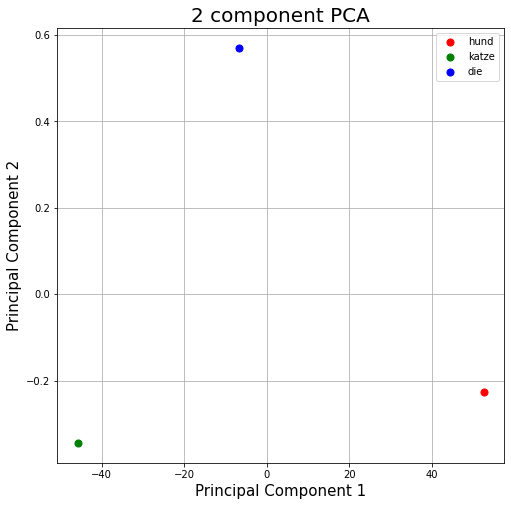

In [392]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = listofstrings
colors = ['r', 'g', 'b']
for target, color in zip(listofstrings,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()